In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# working with file names
import glob

from google.colab import drive
drive.mount('/content/drive')

lc_dir = "/content/drive/MyDrive/SURF_2024/LCdata_taurus_1/"
lc_label_file = "/content/drive/MyDrive/SURF_2024/LCdata_taurus_2/K2_datafile.txt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from astropy.io import fits

def get_normalized_light_curve(file_name):
  hdul = fits.open(file_name)
  primary_hdu = hdul[1]
  data = primary_hdu.data

  lc_data = np.zeros((2, len(data)))

  for i in range(len(data)):
    lc_data[0][i] = data[i][0]
    lc_data[1][i] = data[i][2]

  # normalize flux
  lc_flux = lc_data[1]
  #lc_flux = lc_flux[~np.isnan(lc_flux)]
  median_flux = np.nanmedian(lc_flux)
  lc_data[1] = lc_flux / median_flux


  return lc_data[:, ~np.isnan(lc_data).any(axis=0)]

def get_lc_id(lc_file_name):
  return lc_file_name.replace(lc_dir, "").replace("hlsp_k2yso_k2_lightcurve_epic", "").replace("-c13_kepler_v1.0_lc.fits", "").replace("-c4_kepler_v1.0_lc.fits", "")


def plot_light_curve(lc_data, lc_id):
  plt.figure(figsize=(9, 3))
  plt.title(lc_id)
  plt.plot(lc_data[0], lc_data[1])
  plt.xlabel("Julian Date (JD)")
  plt.ylabel("Normalized Flux")
  plt.show()

In [ ]:
file_name = "/content/drive/MyDrive/SURF_2024/LCdata_taurus_1/hlsp_k2yso_k2_lightcurve_epic210683818-c13_kepler_v1.0_lc.fits"
print(get_normalized_light_curve(file_name))
print(get_lc_id(file_name))

[[2.98758117e+03 2.98760160e+03 2.98762203e+03 ... 3.06810264e+03
  3.06812307e+03 3.06814350e+03]
 [1.02427166e+00 1.01174572e+00 1.00706675e+00 ... 1.10657974e+00
  1.10750363e+00 1.09664293e+00]]
210683818


99


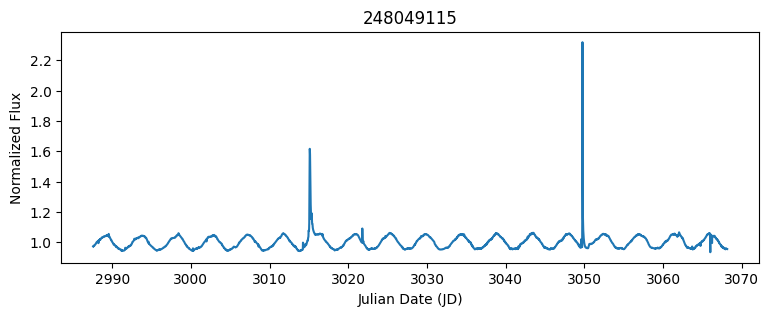

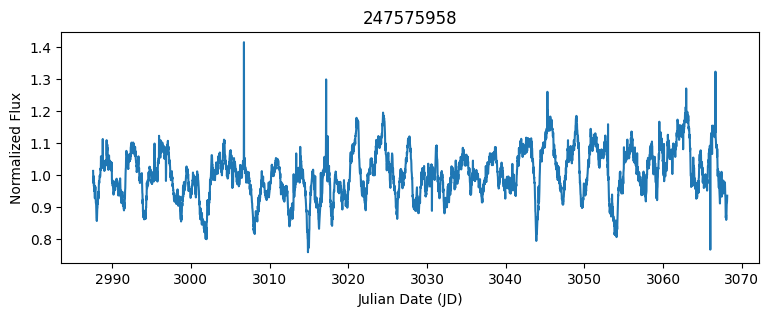

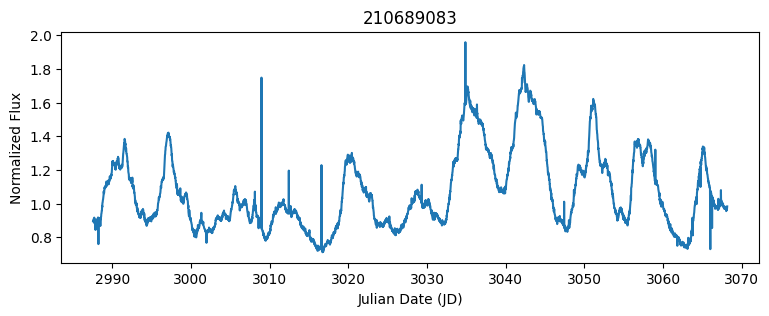

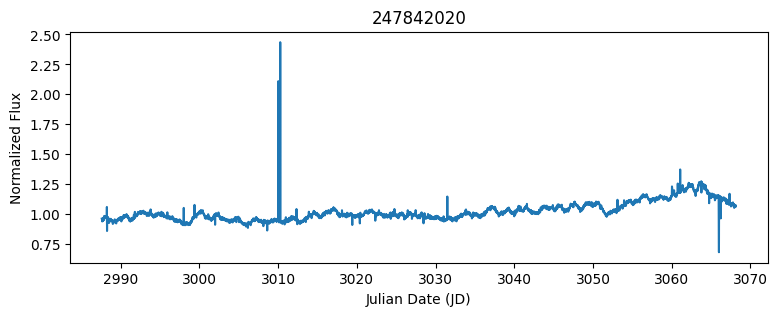

In [ ]:
lc_file_names = glob.glob(lc_dir + "hlsp_k2yso_k2_lightcurve_epic*.fits")
lc_data = []
lc_ids = []

print(len(lc_file_names))

least_data_points = 10000 # used to standarize number of data points

for i in range(len(lc_file_names)):
  cur_file_name = lc_file_names[i]
  cur_lc_data = get_normalized_light_curve(cur_file_name)

  if least_data_points > cur_lc_data.shape[1]:
    least_data_points = cur_lc_data.shape[1]

  cur_lc_id = get_lc_id(cur_file_name)

  lc_data.append(cur_lc_data)
  lc_ids.append(cur_lc_id)

  if (i % 25 == 0):
    plot_light_curve(cur_lc_data, cur_lc_id)

lc_dates = lc_data[0][0].copy()

In [ ]:
# standarizing number of data points
start = 60 # remove first few data points

for i in range(len(lc_data)):
  cur_lc_data = lc_data[i][1]

  if cur_lc_data.shape[0] > least_data_points:
    cur_lc_data = cur_lc_data[:least_data_points]

  cur_lc_data = cur_lc_data[start:]

  lc_data[i] = cur_lc_data

lc_data = np.array(lc_data)
lc_ids = np.array(lc_ids)
lc_dates = lc_dates[start: least_data_points]

In [ ]:
def min_max_normalization(lc_data_point):
  min = np.min(lc_data_point)
  max = np.max(lc_data_point)
  return (lc_data_point - min) / (max - min)

# Min-Max scaling to transform y-values to be between 0 and 1
for i in range(len(lc_data)):
  lc_data[i] = min_max_normalization(lc_data[i])

In [ ]:
def read_label_file(file_name):
  in_file = open(file_name, "r")
  data = in_file.readlines()
  data[0] = data[0].replace("\ufeff", "")
  id_to_label = {}

  for line in data:
    line = line.split()
    if len(line) > 8:
      id_to_label[line[0]] = "/".join(sorted([line[2], line[3]]))
    else:
      id_to_label[line[0]] = line[2]

  return id_to_label

id_to_label = read_label_file(lc_label_file)
print(id_to_label)

{'210683818': 'L', '210689083': 'B', '210690598': 'S', '210690735': 'APD', '210690892': 'S', '210690913': 'S', '210699670': 'B', '210699801': 'B', '210725857': 'QPS', '210777988': 'QPS', '210780789': 'P', '210865655': 'B', '211104793': 'B', '246859790': 'QPS', '246923113': 'S', '246925324': 'B/QPS', '246929818': 'APD', '246942563': 'APD', '246963876': 'B', '246989752': 'QPD', '246990243': 'B', '247027353': 'B', '247031423': 'MP', '247035365': 'QPS', '247046059': 'QPS', '247047380': 'B', '247051861': 'P', '247078342': 'QPD', '247103541': 'APD', '247520207': 'QPD', '247534022': 'QPS', '247573157': 'MP', '247575425': 'S', '247575958': 'QPS', '247583818': 'QPS', '247584113': 'S', '247585465': 'B', '247589612': 'APD/QPS', '247590222': 'S', '247591534': 'QPS', '247592103': 'MP', '247592463': 'APD', '247592919': 'B', '247593952': 'P', '247596872': 'MP', '247601658': 'P', '247604953': 'S', '247763883': 'QPS', '247764745': 'QPD', '247788960': 'QPS', '247789209': 'B', '247791801': 'QPD', '247792

In [ ]:
def read_label_file(file_name):
  in_file = open(file_name, "r")
  data = in_file.readlines()

  for line in data:
    print(line)
  data[0] = data[0].replace("\ufeff", "")
  id_to_label = {}

  for line in data:
    line = line.split()
    if len(line) > 8:
      id_to_label[line[0]] = line[2] + "/" + line[3]
    else:
      id_to_label[line[0]] = line[2]

  print(data)

  return id_to_label

id_to_label = read_label_file(lc_label_file)

﻿210683818	J04313407+1808049	L		0.17	109.31		1.0	0.14	

210689083	J04313747+1812244	B		0.77	7.58		0.65	-0.76	

210690598	J04313613+1813432	S		0.47	25.25		0.86	-0.5	

210690735	J04300399+1813493	APD		0.84	5.52		0.9	0.15	

210690892	J04314007+1813571	S		0.5	46.85		1.0	-0.13	

210690913	J04313843+1813576	S		0.25	22.80		1.0	-0.3	

210699670	J04315968+1821305	B		1.36	16.67		0.81	-0.6	

210699801	J04315779+1821380	B		0.07	4.03		0.77	-0.25	

210725857	J04285053+1844361	QPS	APD	0.14	2.07		0.64	0.12	

210777988	J04215943+1932063	QPS		0.12	2.81		0.65	-0.07	

210780789	J04221332+1934392	P		0.1	1.33		0.18	0.23	

210865655	J04102834+2051507	B		0.19	8.06		0.74	-0.6	

211104793	J04124068+2438157	B		0.2	5.81		0.77	-0.46	

246859790	J04440164+1621324	QPS	APD	0.08	2.17		0.66	0.18	

246923113	J04470620+1658428	S		0.75	12.50		0.87	-0.03	

246925324	J04465305+1700001	B	QPS	0.31	15.62	3.01	0.54	-0.87	

246929818	J04465897+1702381	APD		0.58	10.87		0.75	0.5	

246942563	J04542368+1709534	APD		0.17	5.07		0.85	0

In [ ]:
lc_labels = np.copy(lc_ids)
for i in range(len(lc_ids)):
  lc_labels[i] = id_to_label[lc_ids[i]]

label_to_color = {"APD": "blue", "B": "orange", "L": "black", "MP": "magenta",
                  "P": "purple", "QPS": "green", "QPD": "cyan", "S": "red",
                  "N": "brown", "U": "brown", "QP": "brown", "APD/QPS": "gray",
                  "B/QPS": "gray"}
labels = ["APD", "B", "L", "MP", "P", "QPS", "QPD", "S", "N", "U", "QP"]

In [ ]:
# Plot the clustered time series
def plot_clustered_time_series(num_clusters, lc_data):
  plt.figure(figsize=(9, 18))
  for cluster in range(num_clusters):
      plt.subplot(num_clusters, 1, cluster + 1)
      for i in range(len(lc_data)):
          if cluster_labels[i] == cluster:
              plt.plot(lc_data[i], alpha=0.5)
      plt.title(f'Cluster {cluster + 1}')
  plt.tight_layout()
  plt.show()

In [ ]:
# Plot the clustered time series in color
def plot_clustered_time_series_color(num_clusters, lc_data):
  plt.figure(figsize=(9, 24))
  for cluster in range(num_clusters):
      plt.subplot(num_clusters, 1, cluster + 1)
      for i in range(len(lc_data)):
          if cluster_labels[i] == cluster:
              plt.plot(lc_data[i], alpha=0.5, color=label_to_color[lc_labels[i]])
      plt.title(f'Cluster {cluster + 1}')
  plt.tight_layout()
  plt.show()

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# plot histograms of cluster distributions for a given category
def plot_cluster_hist(label, num_clusters):
  cluster_list = []
  for i in range(len(lc_labels)):
    if lc_labels[i] == label:
      cluster_list.append(cluster_labels[i] + 1)

  plot_color = label_to_color[label]

  fig, ax = plt.subplots()

  n, bins, patches = ax.hist(cluster_list, bins=num_clusters, color=plot_color)

  bin_centers = 0.5 * (bins[:-1] + bins[1:])
  ax.set_xticks(bin_centers)
  ax.title.set_text(label)

  labels = np.linspace(0, num_clusters-1, num_clusters) + 1
  labels = labels.astype(int)
  ax.set_xticklabels(labels)

  # Add an inset showing the total number of instances
  total_instances = len(cluster_list)
  inset_ax = inset_axes(ax, width="20%", height="15%", loc='upper right')
  inset_ax.text(0.5, 0.5, f'Total Instances:\n{total_instances}', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
  inset_ax.axis('off')  # Hide the axis

  plt.show()

In [ ]:
from collections import Counter

def plot_cluster_group(cluster):
  cluster_groups = []
  for i in range(len(lc_data)):
    if cluster_labels[i] == cluster:
      cluster_groups.append(lc_labels[i])

  cluster_counts = Counter(cluster_groups)

  # Ensure the counts are in the same order as the group list
  counts = [cluster_counts[group] for group in labels]

  # Get colors
  colors = []
  for group in labels:
    colors.append(label_to_color[group])

  # Create a bar plot
  plt.figure(figsize=(10, 6))
  bars = plt.bar(labels, counts, color=colors)

  # Add labels and title
  plt.xlabel('Groups')
  plt.ylabel('Count')
  plt.title('Cluster ' + str(cluster + 1))

  # Add count on top of bars
  for bar, count in zip(bars, counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, count, ha='center', va='bottom')

  # Add an inset showing the total number of instances
  total_instances = len(cluster_groups)
  inset_ax = inset_axes(plt.gca(), width="20%", height="15%", loc='upper right')
  inset_ax.text(0.5, 0.5, f'Total Instances:\n{total_instances}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
  inset_ax.axis('off')  # Hide the axis

  # Show the plot
  plt.show()

In [ ]:
def graph_separate_groups_in_cluster(cluster):
  cluster_groups = {}
  for i in range(len(lc_data)):
    if cluster_labels[i] == cluster:
      cur_label = lc_labels[i]
      if cur_label not in cluster_groups.keys():
        cluster_groups[cur_label] = [i]
      else:
        cluster_groups[cur_label].append(i)

  for group in labels:
    if group in cluster_groups.keys():
      plt.figure(figsize=(12, 5))
      cur_lcs = cluster_groups[group]
      if len(cur_lcs) <= 1:
        cur_color = label_to_color[group]
        for cur_lc in cur_lcs:
          plt.plot(lc_dates, lc_data[cur_lc], color=cur_color, alpha=.5)
      else:
        for cur_lc in cur_lcs:
          plt.plot(lc_dates, lc_data[cur_lc], alpha=.5)
      plt.title("Group " + group)
      plt.show()

In [ ]:
# Apply Spectral Clustering
from sklearn.cluster import SpectralClustering

num_clusters = 8
random_state = 42
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=random_state)
cluster_labels = spectral.fit_predict(lc_data)

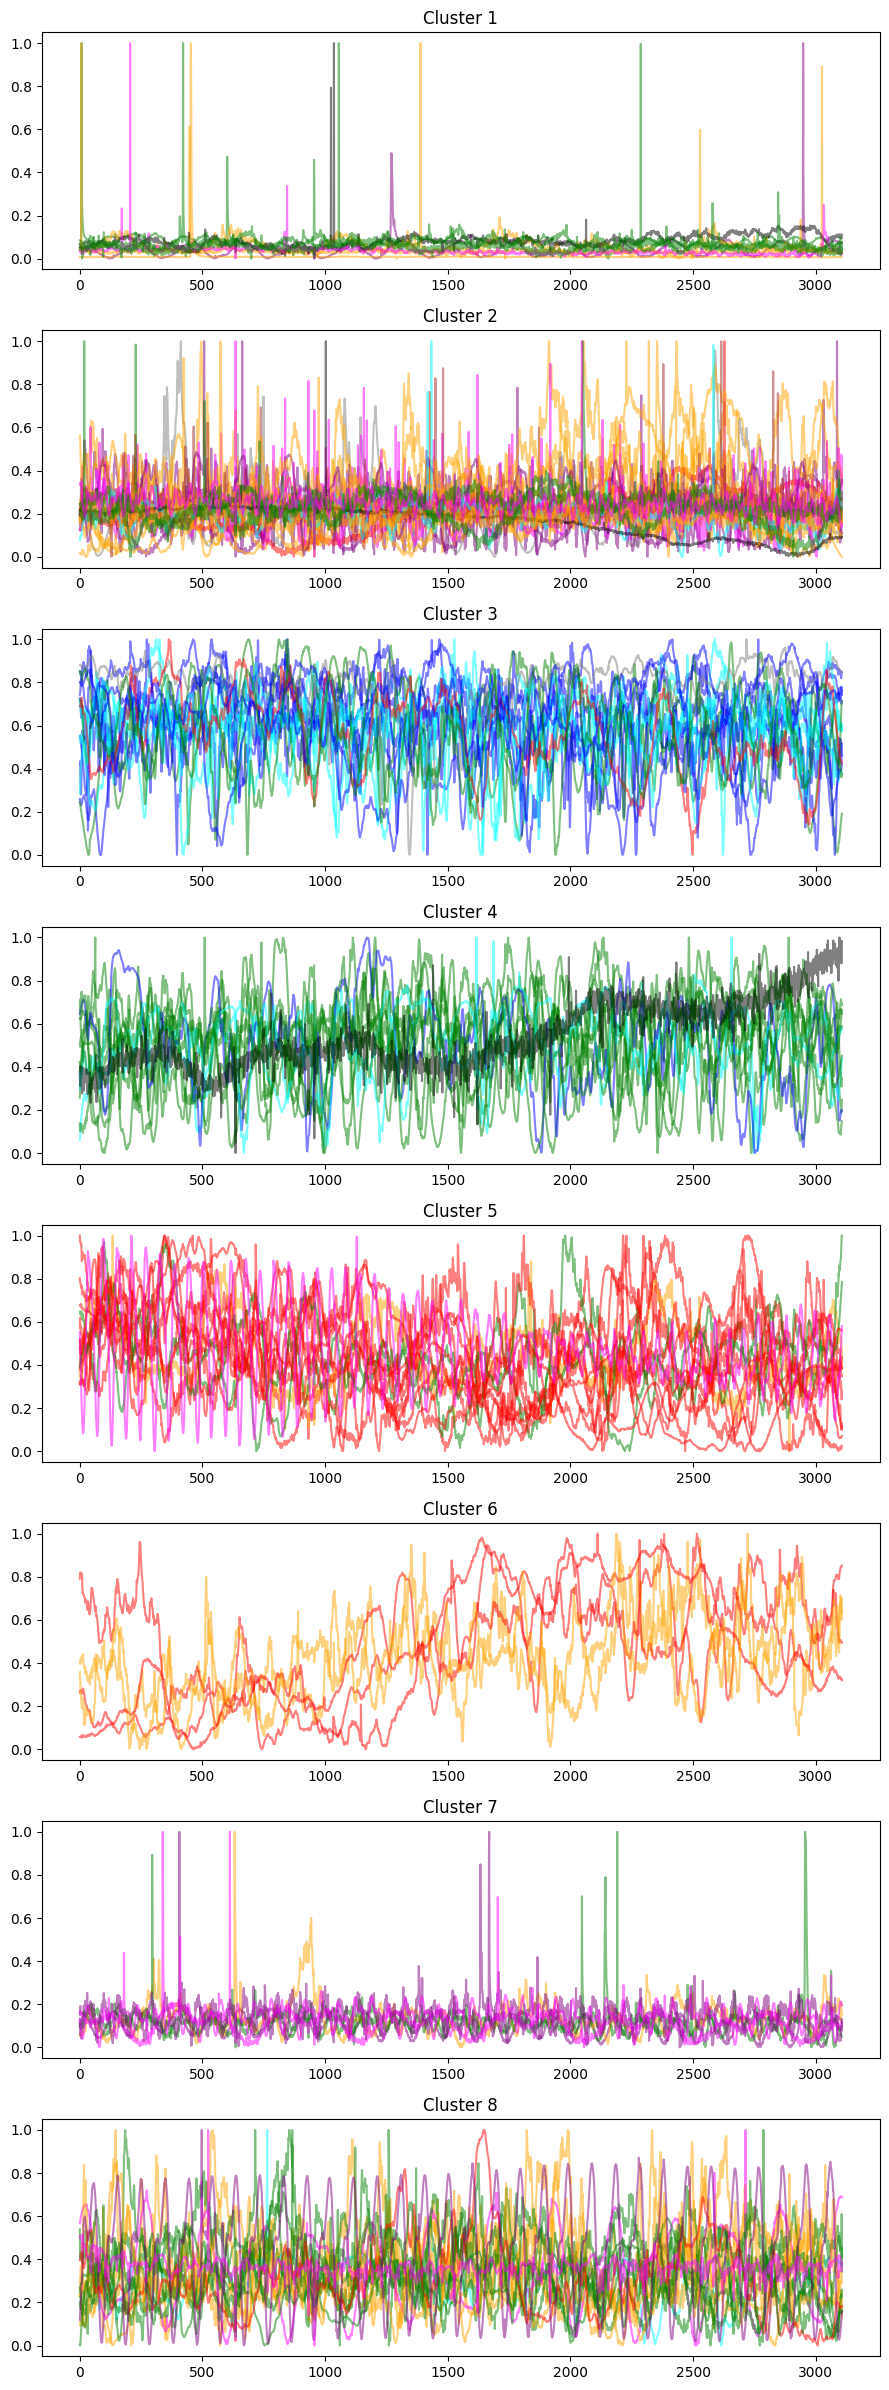

In [ ]:
plot_clustered_time_series_color(num_clusters, lc_data)

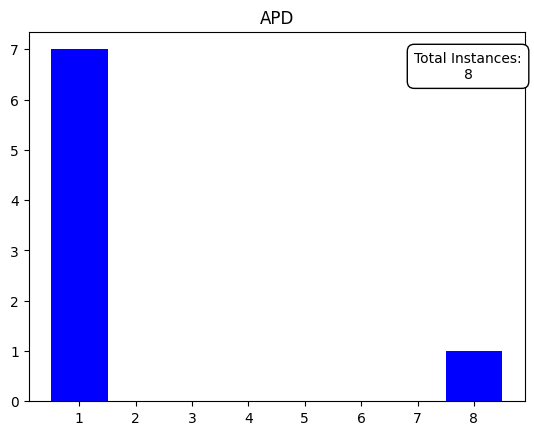

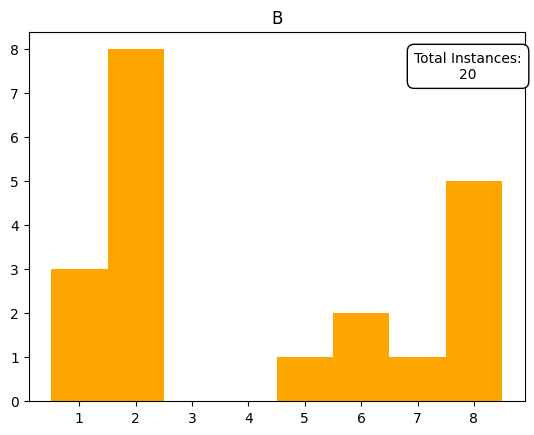

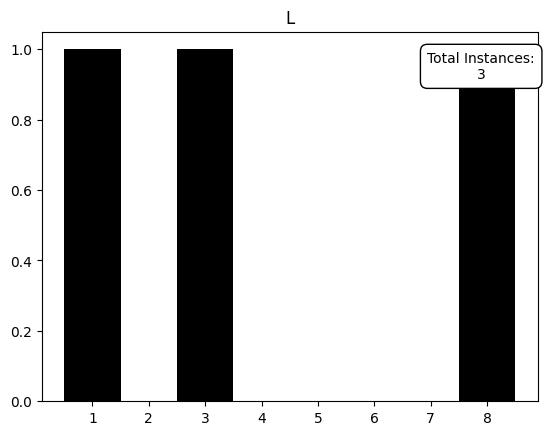

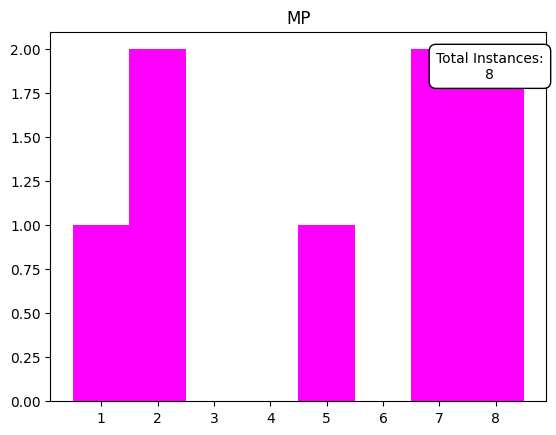

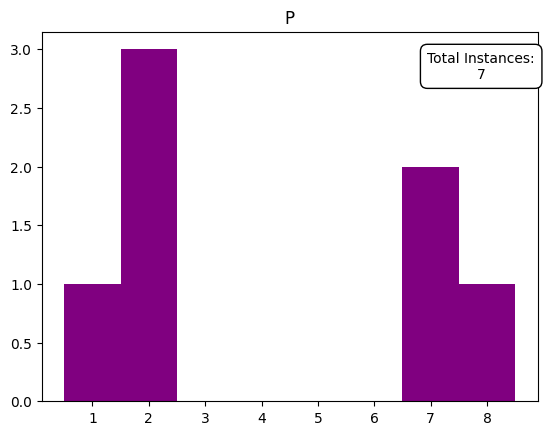

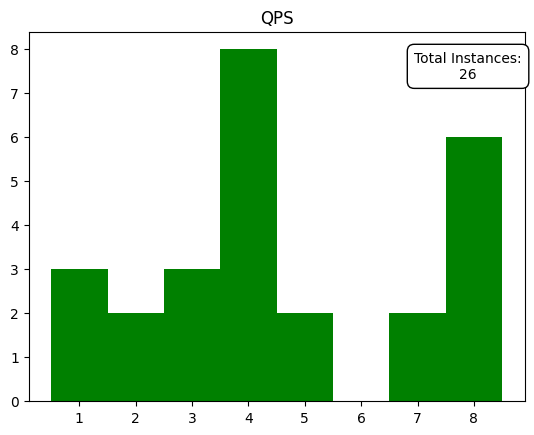

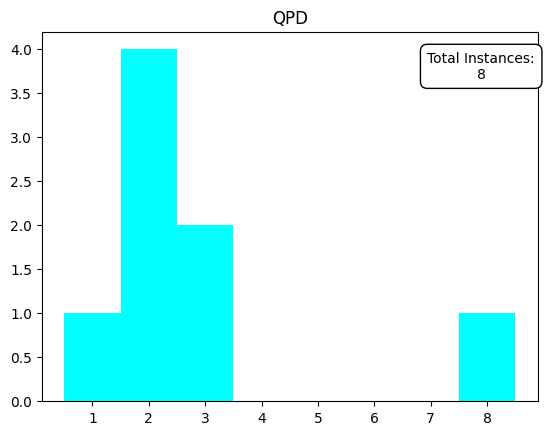

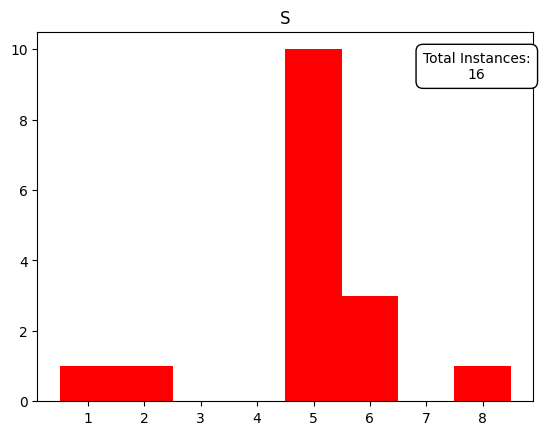

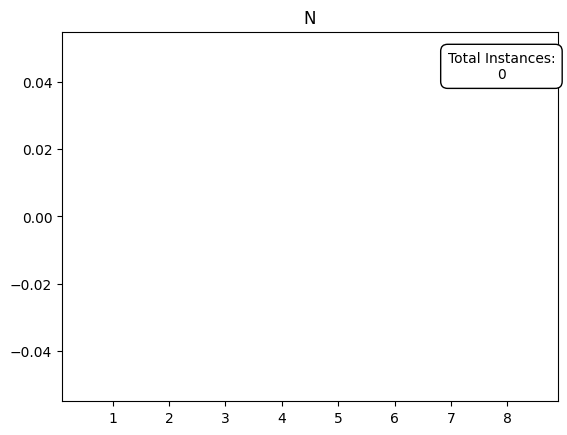

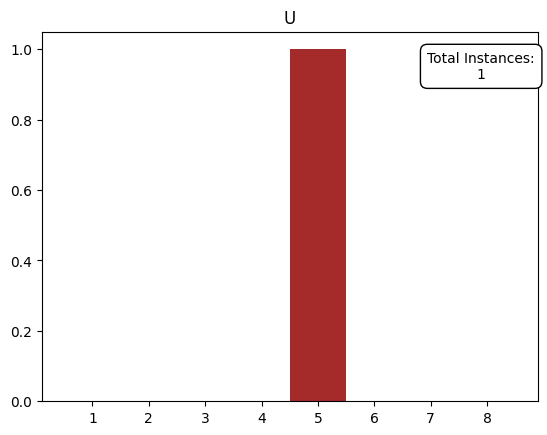

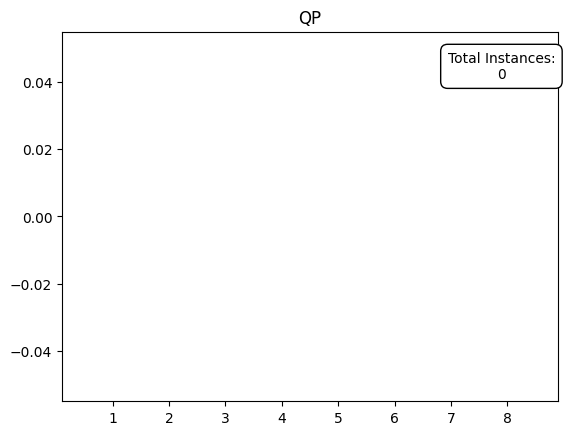

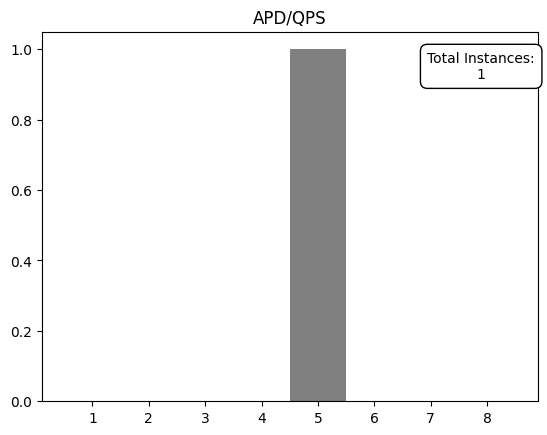

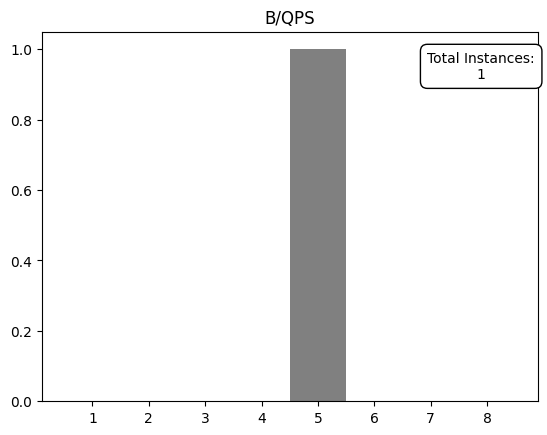

In [ ]:
for cur_label in label_to_color.keys():
  plot_cluster_hist(cur_label, num_clusters)

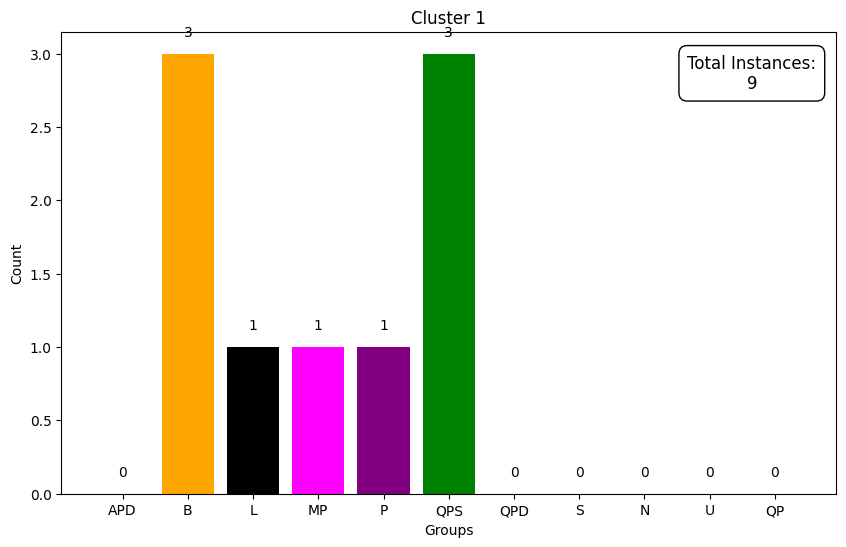

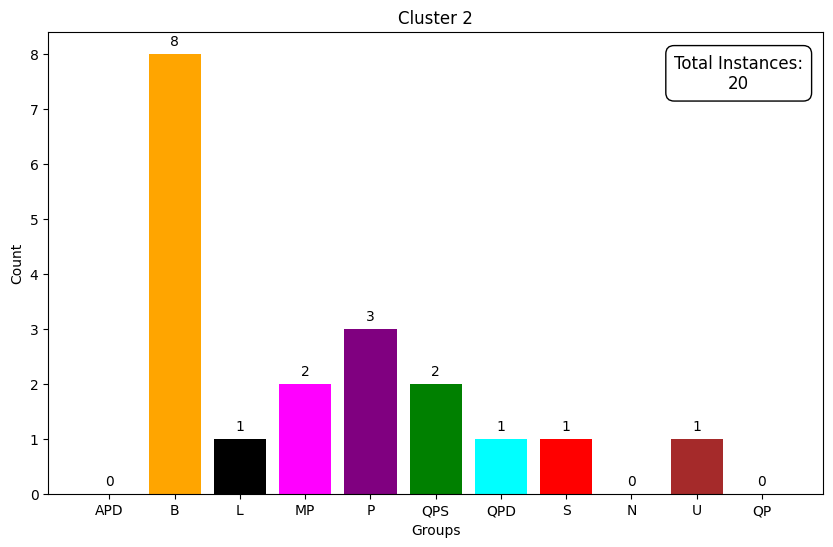

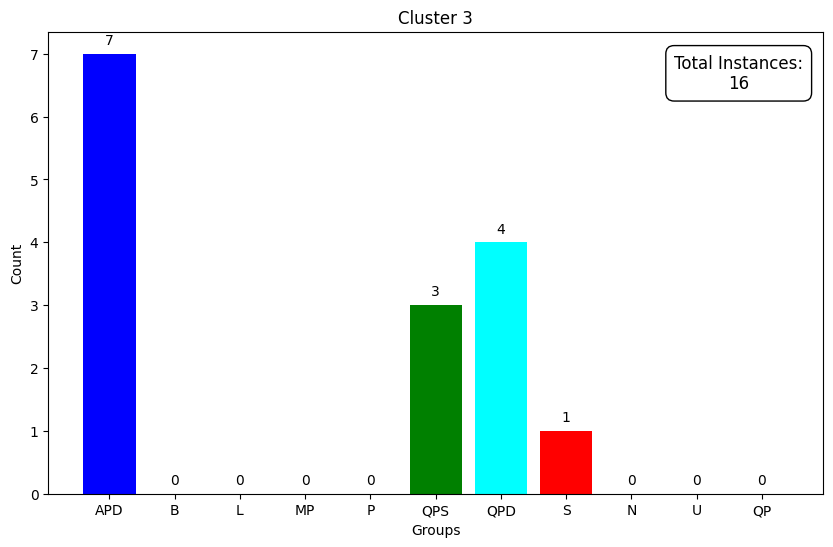

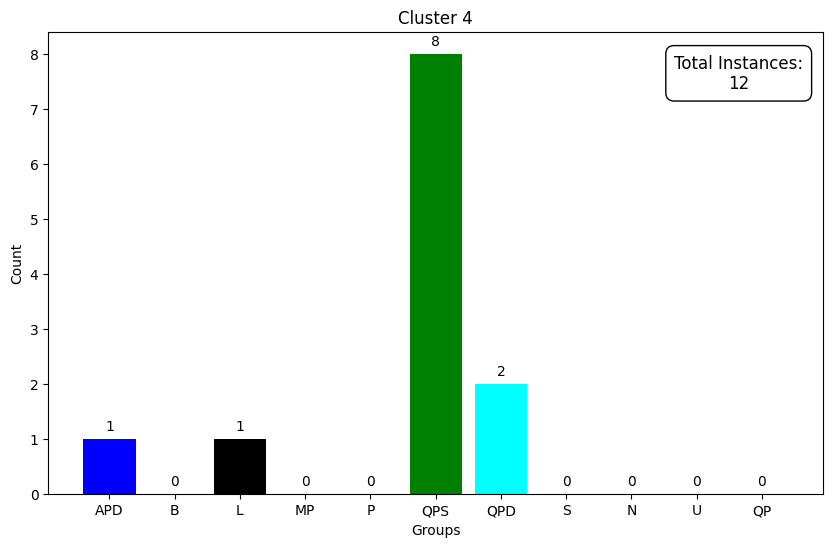

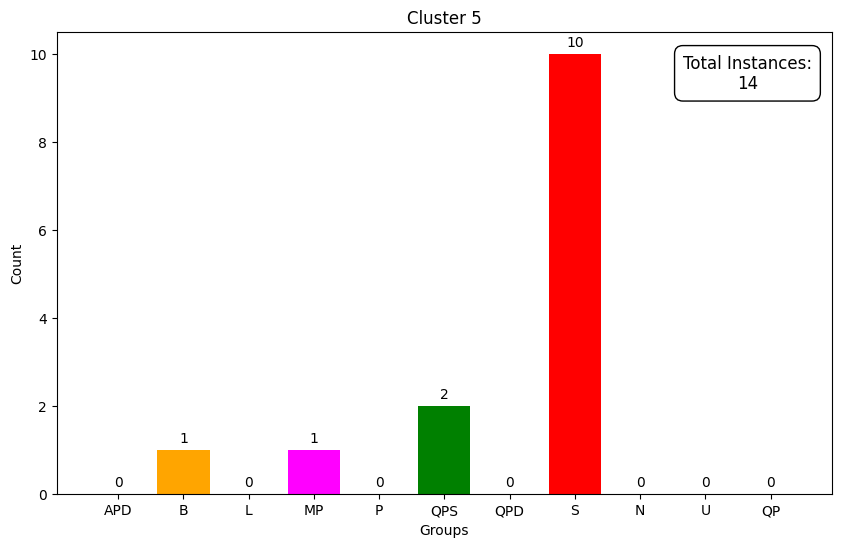

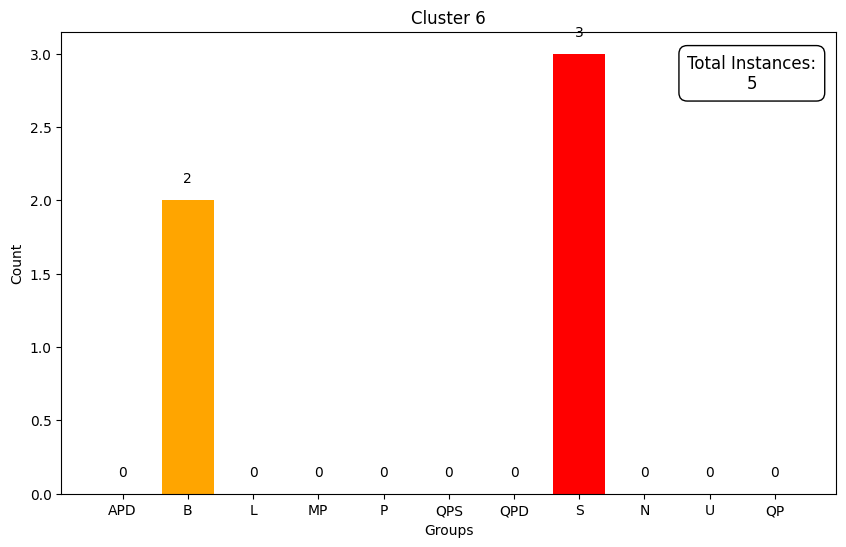

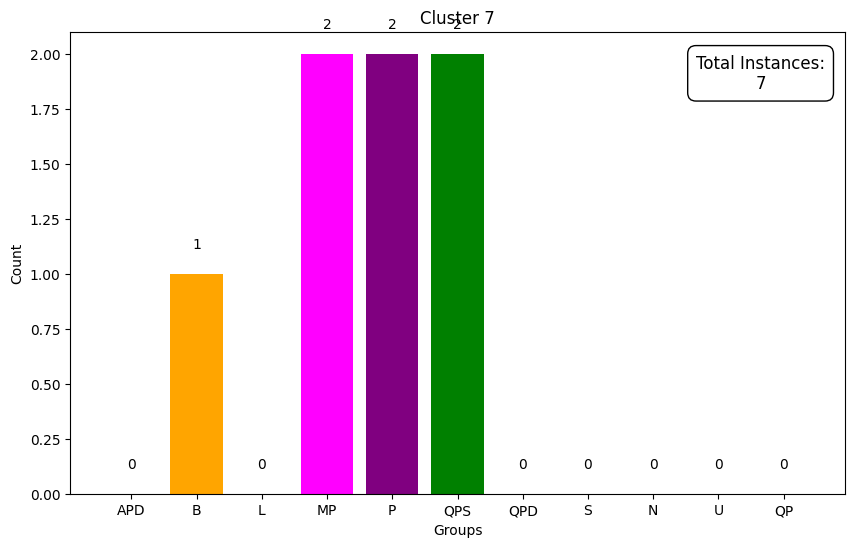

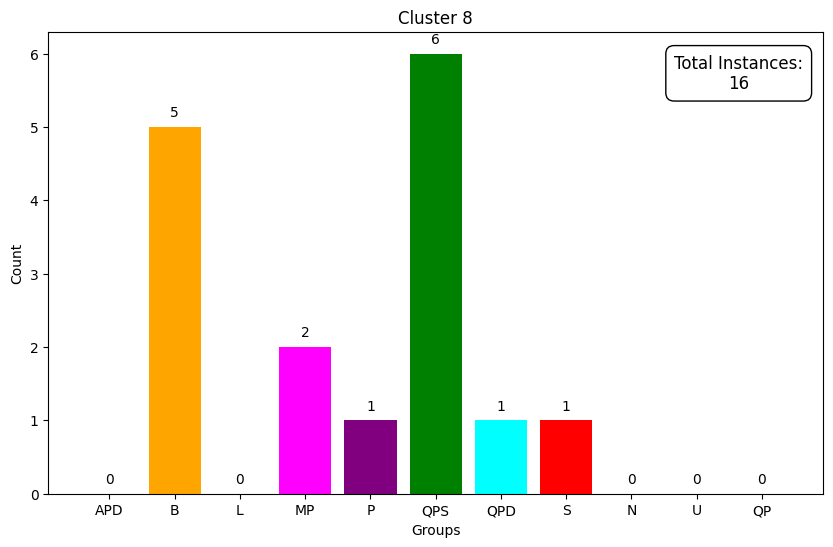

In [ ]:
for i in range(num_clusters):
  plot_cluster_group(i)

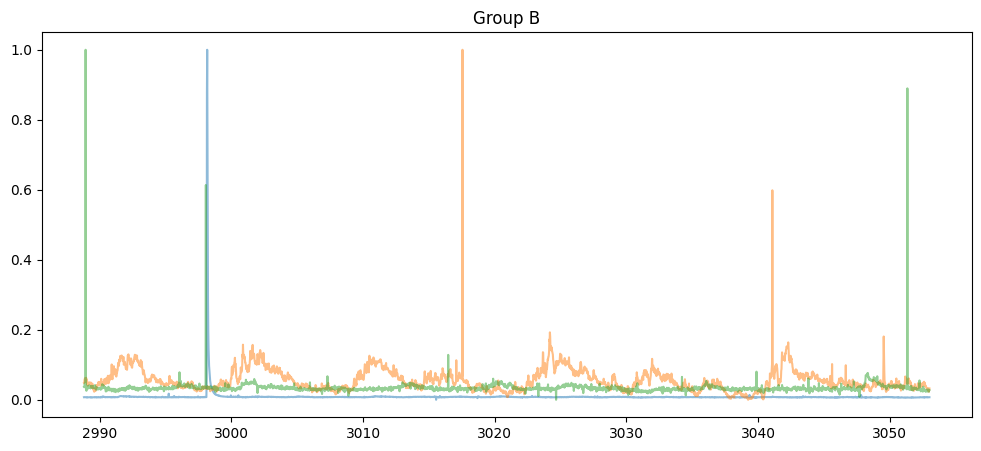

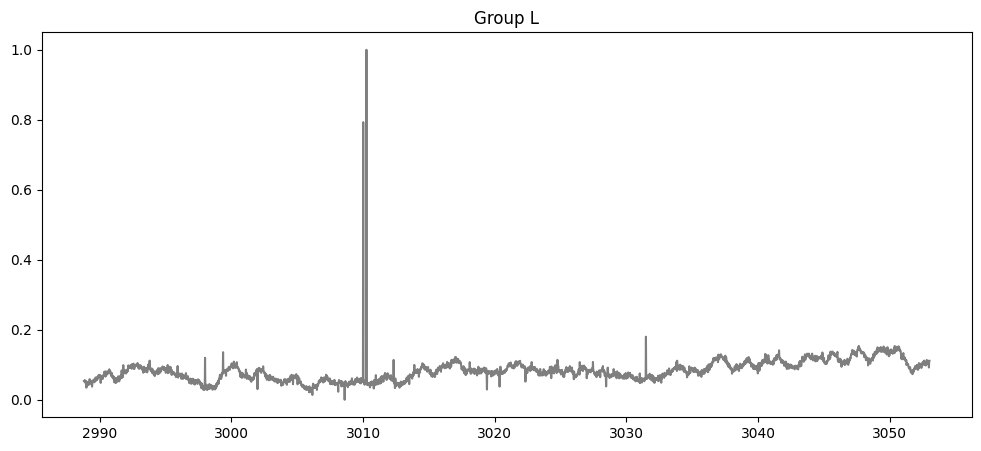

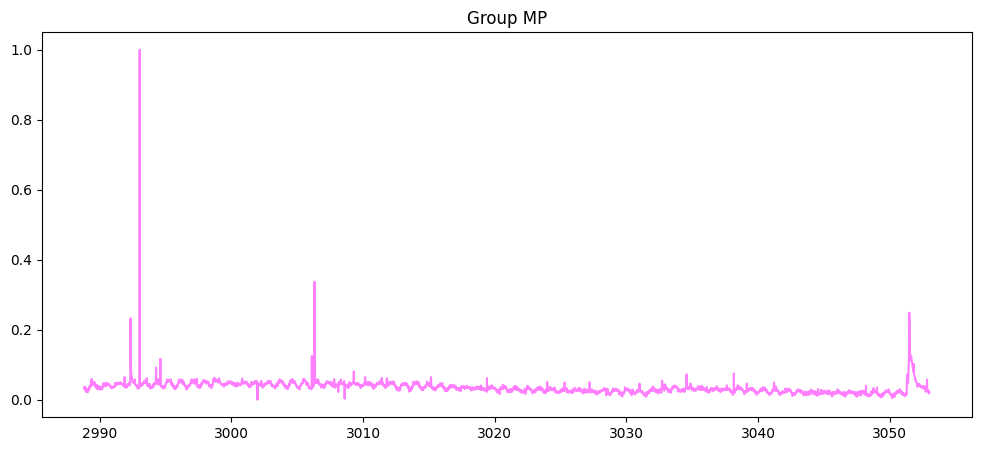

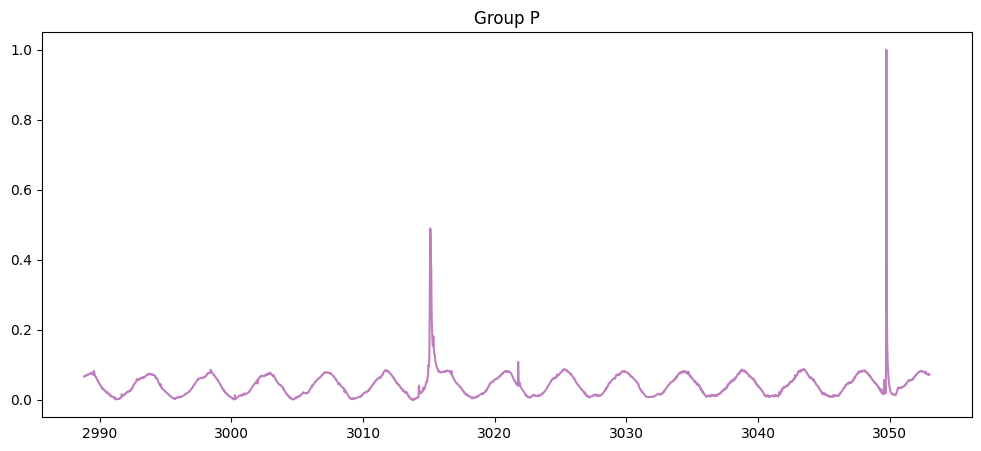

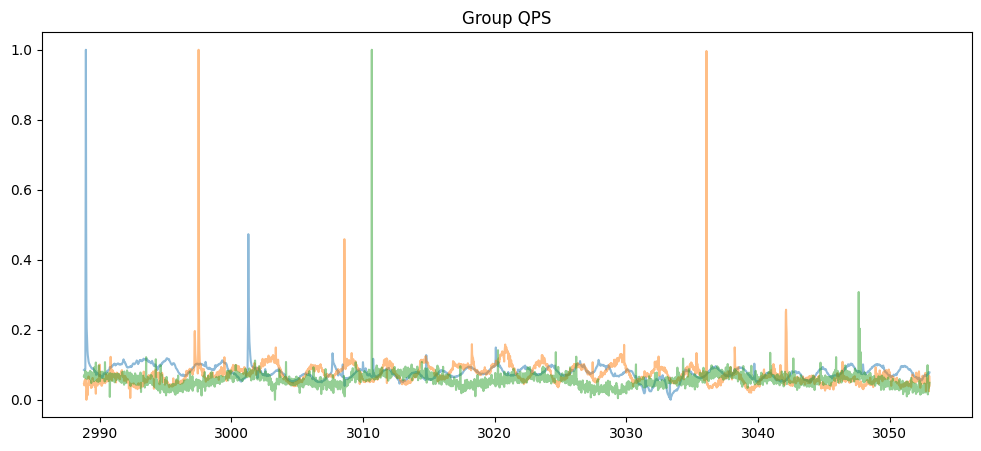

In [ ]:
graph_separate_groups_in_cluster(0)

In [ ]:
def plot_light_curve_no_date(lc_data, lc_id):
  plt.figure(figsize=(9, 3))
  plt.title(lc_id)
  plt.plot(lc_dates, lc_data)
  plt.xlabel("Julian Date (JD)")
  plt.ylabel("Normalized Flux")
  plt.show()